<a href="https://colab.research.google.com/github/obeabi/SdsOctober2020Challenge/blob/main/EDA_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
# SDS October Challenge #2 - Used Car Prices
## 2021-01-02

This month you have been hired by a new car trader company to help sell its used cars. You will be analyzing used cars from multiple manufacturers and of different models. Your job is to help the car trader company determine the price of its used cars.

## Step 1: Data Preprocessing 

In [80]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import  zscore
#import category_encoders as ce

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

np.random.seed(0)

Libraries installed successfully!


In [81]:
# Importing the training dataset

df_train = pd.read_csv('public_cars.csv', engine= 'python', encoding= 'latin1')

df_train.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,hatchback,False,owned,front,True,False,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,minivan,False,owned,front,False,True,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,minivan,False,owned,front,False,False,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,universal,False,owned,front,False,True,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,sedan,False,owned,front,False,False,False,False,False,False,False,False,False,True,160,1600.0


In [82]:
# Importing the test dataset

df_test = pd.read_csv('pred_cars.csv', engine= 'python', encoding= 'latin1')

df_test.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Renault,Megane,mechanical,blue,360000,1997,gasoline,False,gasoline,1.6,coupe,False,owned,front,False,True,False,False,False,False,False,True,False,True,114
1,Peugeot,206,mechanical,silver,267000,1999,gasoline,False,gasoline,1.4,hatchback,False,owned,front,False,False,False,False,False,False,False,False,False,True,67
2,Volkswagen,Sharan,mechanical,blue,172000,2000,gasoline,False,gasoline,2.0,minivan,False,owned,front,True,False,False,False,False,False,False,False,False,False,50
3,Volvo,XC60,mechanical,white,230000,2009,diesel,False,diesel,2.4,universal,False,owned,front,False,True,True,True,False,True,True,True,True,True,79
4,Mazda,3,mechanical,silver,206000,2007,gasoline,False,gasoline,1.6,sedan,False,owned,front,False,True,False,True,False,True,False,False,False,False,74


In [83]:
# priniting the details about the train dataset

print("\nEDA on Training Set\n")
print("#"*30)

print("\nFeatures/Columns : \n", df_train.columns)
print("\n\nNumber of Features/Columns : ", len(df_train.columns))
print("\nNumber of Rows : ",len(df_train))
print("\n\nData Types :\n", df_train.dtypes)

print("\n Contains NaN/Empty cells : ", df_train.isnull().values.any())

print("\n Total empty cells by column :\n", df_train.isnull().sum(), "\n\n")

print("\n Perecentage of missing values in train datframe is: \n", str(100*(df_train.isnull().sum().sum()/len(df_train)))+'%')



EDA on Training Set

##############################

Features/Columns : 
 Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'duration_listed', 'price_usd'],
      dtype='object')


Number of Features/Columns :  26

Number of Rows :  30824


Data Types :
 manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
fe

In [84]:
# priniting the details about the test dataset

print("#"*30)
print("\nEDA on Test Set\n")
print("#"*30)


print("\nFeatures/Columns : \n",df_test.columns)
print("\n\nNumber of Features/Columns : ",len(df_test.columns))
print("\nNumber of Rows : ",len(df_test))
print("\n\nData Types :\n", df_test.dtypes)
print("\n Contains NaN/Empty cells : ", df_test.isnull().values.any())
print("\n Total empty cells by column :\n", df_test.isnull().sum())
print("\n Perecentage of missing values in test datframe is: \n", str(100*(df_test.isnull().sum().sum()/len(df_test)))+'%')

##############################

EDA on Test Set

##############################

Features/Columns : 
 Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'duration_listed'],
      dtype='object')


Number of Features/Columns :  25

Number of Rows :  7707


Data Types :
 manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain        

In [85]:
# Create artifical column for price_usd based on average proce of car
# a categorical variable based on price_usd as  0 and 1
def price_cat(price):
    if price <= mean_price:
        return 0.0
    else:
        return 1.0

mean_price = df_train.price_usd.mean()
#df_train['price_category'] = df_train['price_usd'].apply(price_cat)

  
df_train.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,hatchback,False,owned,front,True,False,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,minivan,False,owned,front,False,True,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,minivan,False,owned,front,False,False,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,universal,False,owned,front,False,True,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,sedan,False,owned,front,False,False,False,False,False,False,False,False,False,True,160,1600.0


In [86]:
# Extract numerical columns from train dataframe
numerical_cols = [cname for cname in df_train.columns if
                df_train[cname].dtype in ['int64', 'float64']]

num_train= df_train[numerical_cols].copy()

num_train.head()

,odometer_value,year_produced,engine_capacity,duration_listed,price_usd
0,245000,2006,1.6,7,4250.0
1,265542,2002,3.3,133,4000.0
2,168000,2009,1.8,0,10900.0
3,225522,2008,1.8,20,6999.0
4,370000,1991,1.8,160,1600.0


In [87]:
# Check how the varaibles aftect the price category (useful for classification problem)
target_column = 'price_usd'

# For classification problem
#num_train.groupby(target_column).mean() # Not a complete picture

In [88]:
# print column names
num_train.columns

Index(['odometer_value', 'year_produced', 'engine_capacity', 'duration_listed',
       'price_usd'],
      dtype='object')

In [89]:
# useful for classification problem
#num_feat = numerical_cols[:-2]

#for i in num_feat:
#    low = list(df_train[df_train[target_column] == 0][i].dropna())
#    high = list(df_train[df_train[target_column] == 1][i].dropna())
#    xmin = min(min(low), min(high))   # define accordingly
#    xmax = max(max(low), max(high))   # define accordingle
#    width = (xmax - xmin) / 40
#    sns.distplot(low, color='r', kde=False, bins=np.arange(xmin, xmax, width))  # define accordignly
#    sns.distplot(high, color='g', kde=False, bins=np.arange(xmin, xmax, width)) # define accordingly
#    plt.legend(['Low', 'High'])
#    plt.title('Overlaid histogram for {}'.format(i))
#    plt.show()

<Figure size 576x432 with 0 Axes>

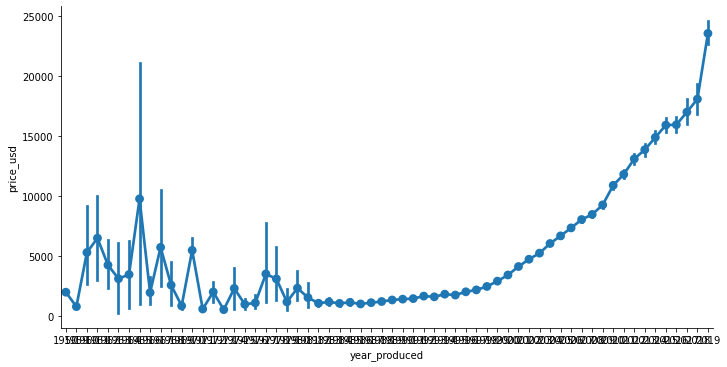

<Figure size 576x432 with 0 Axes>

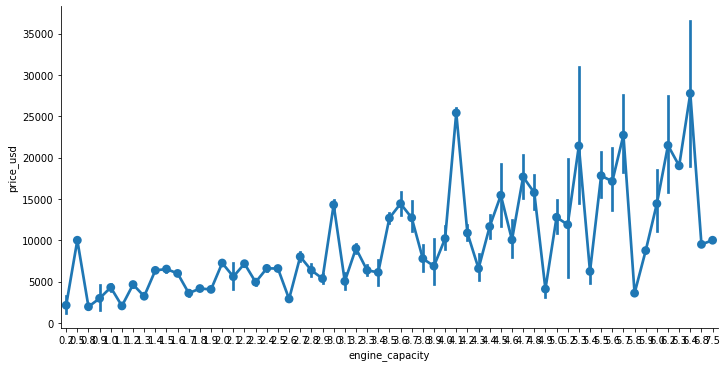

In [90]:
# For the ordinal features
for i, col in enumerate(['year_produced', 'engine_capacity']):
    plt.figure(i)
    sns.catplot(x=col, y='price_usd', data=df_train, kind='point', aspect=2,)
    plt.show()

#### Fixing the missing values

In [91]:
# Handle the missing values in target field if applicable

print("Original Length of Training Set : ", len(df_train))
df_train.dropna(subset=['price_usd'], axis = 0, inplace= True)
print("Length of Training Set after dropping NaN in target column: ", len(df_train))

Original Length of Training Set :  30824
Length of Training Set after dropping NaN in target column:  30824


In [92]:
# Check if the missing value in the column is missing at random or not in random (useful for classification problem)

num_train.groupby(num_train['engine_capacity'].isnull()).mean() # Not a complete picture

,odometer_value,year_produced,engine_capacity,duration_listed,price_usd
engine_capacity,,,,,
False,248848.781315,2002.936754,2.054232,80.352836,6627.403698
True,72956.250000,2014.250000,NaN,47.875000,18937.375000


In [93]:
# Handle the missing values in features 
print("Original Length of Training Set : ", len(df_train))

# Drop missing values all at once
#df_train = df_train.dropna( ) # dropping the NaN value.  we chose to drop it since the percentage of  NaN value is so small i.e. less than 1%

# To fill specific column use the following
df_train['engine_capacity'].fillna(df_train['engine_capacity'].mean(), inplace=True)

print("Length of Training Set after dropping NaN in target column: ", len(df_train))

Original Length of Training Set :  30824
Length of Training Set after dropping NaN in target column:  30824


In [94]:
# Confirm the presence of no missing values

df_train.isnull().sum().sum()

0

In [95]:
# Handle missing values in test dataframe

print("Original Length of Test Set : ", len(df_test))

#df_test = df_test.dropna() # dropping the NaN value.  
df_test['engine_capacity'].fillna(df_test['engine_capacity'].mean(), inplace=True)

print("Length of Test Set after dropping NaN: ", len(df_test))

Original Length of Test Set :  7707
Length of Test Set after dropping NaN:  7707


In [96]:
# Confirm no missing values in test dataframe
df_test.isnull().sum().sum()

0

In [97]:
# Define continous features as one new dataframe
# Extract numerical columns from train dataframe
numerical_cols = [cname for cname in df_train.columns if
                df_train[cname].dtype in ['int64', 'float64']]


num_df_train = df_train[numerical_cols].copy()

#num_df_train.drop( ['price_category'], axis = 1, inplace= True)

num_df_train.head()

,odometer_value,year_produced,engine_capacity,duration_listed,price_usd
0,245000,2006,1.6,7,4250.0
1,265542,2002,3.3,133,4000.0
2,168000,2009,1.8,0,10900.0
3,225522,2008,1.8,20,6999.0
4,370000,1991,1.8,160,1600.0


### Explore Continous features

In [98]:
# Let's print the basic statistics
num_df_train.describe()

,odometer_value,year_produced,engine_capacity,duration_listed,price_usd
count,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000
mean,248803.130515,2002.939690,2.054232,80.344407,6630.598604
std,135760.720763,8.048786,0.667449,112.656926,6412.213626
min,0.000000,1950.000000,0.200000,0.000000,1.000000
25%,158146.500000,1998.000000,1.600000,23.000000,2145.857500
50%,250000.000000,2003.000000,2.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,91.000000,8950.000000
max,1000000.000000,2019.000000,7.500000,2232.000000,50000.000000


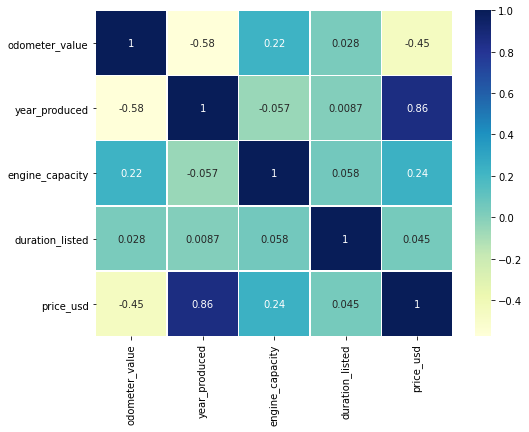

In [99]:
# For regression problem
corr_matrix = num_df_train.corr(method= 'spearman')

# Plot correlation heatmap

ax = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True,  linewidths=.5)

#### From the correlation heat map it is clear that the duration_listed does not have any significant impact on price of car. In addition there is some although nit signifcant corraltion between odometer_value and year_produced.

### Visualize relationship between each numerical varaible and price_usd

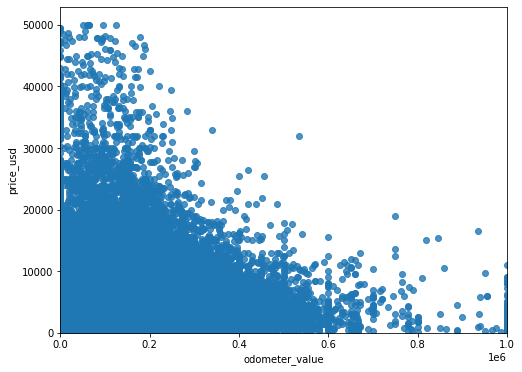

In [100]:
# Odometer_value vs price_usd
sns.regplot(x = 'odometer_value', y = 'price_usd', data = num_df_train,)
plt.ylim(0,)
plt.show()

In [101]:
# Statistical test via ptest 
pearson_coef, p_value = stats.pearsonr(num_df_train['odometer_value'], num_df_train['price_usd'])

print("The Pearson coefccient for odometer_value is", pearson_coef, "with a P-value of P=", p_value)

The Pearson coefccient for odometer_value is -0.4195626448283515 with a P-value of P= 0.0


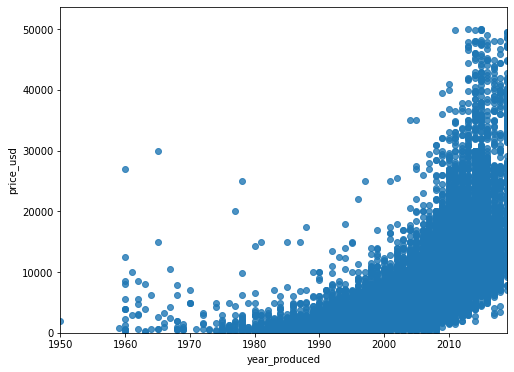

In [102]:
# year_produced vs price_usd
sns.regplot(x = 'year_produced', y = 'price_usd', data = num_df_train,)
plt.ylim(0,)
plt.show()

In [103]:
# Statistical test via ptest 
pearson_coef, p_value = stats.pearsonr(num_df_train['year_produced'], num_df_train['price_usd'])

print("The Pearson coefccient for year_produced is", pearson_coef, "with a P-value of P=", p_value)

The Pearson coefccient for year_produced is 0.7074700046849264 with a P-value of P= 0.0


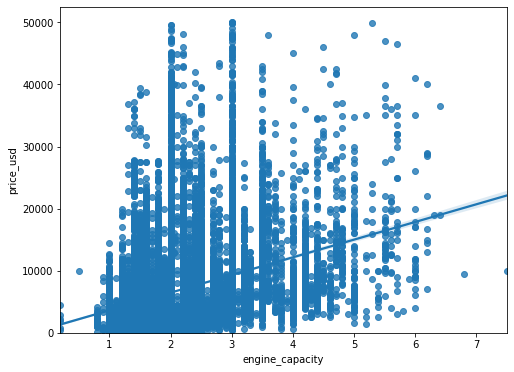

In [104]:
# engine_capacity vs price_usd
sns.regplot(x = 'engine_capacity', y = 'price_usd', data = num_df_train,)
plt.ylim(0,)
plt.show()

In [105]:
# Statistical test via ptest 
pearson_coef, p_value = stats.pearsonr(num_df_train['engine_capacity'], num_df_train['price_usd'])

print("The Pearson coefccient for engine_capcity is", pearson_coef, "with a P-value of P=", p_value)

The Pearson coefccient for engine_capcity is 0.2960999004247874 with a P-value of P= 0.0


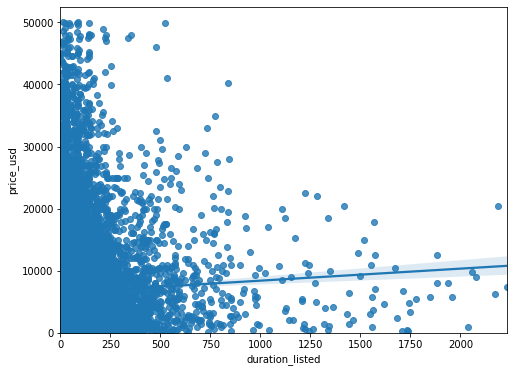

In [106]:
# duration_listed vs price_usd
sns.regplot(x = 'duration_listed', y = 'price_usd', data = num_df_train,)
plt.ylim(0,)
plt.show()

In [107]:
# Statistical test via ptest 
pearson_coef, p_value = stats.pearsonr(num_df_train['duration_listed'], num_df_train['price_usd'])

print("The Pearson coeefccient for duration_listed is", pearson_coef, "with a P-value of P=", p_value)

The Pearson coeefccient for duration_listed is 0.0339866343992507 with a P-value of P= 2.395390296130876e-09


#### We can see that the important numerical columns include: odometer_ value (fairly important), year_produced (very important), engine_capacity (not so important), duration_listed (will drop)

In [108]:
# Let's define the numerical columns to keep
num_features_eda = ['odometer_value', 'year_produced','engine_capacity','price_usd']

num_df_train = df_train[num_features_eda].copy()

num_df_train.head()

,odometer_value,year_produced,engine_capacity,price_usd
0,245000,2006,1.6,4250.0
1,265542,2002,3.3,4000.0
2,168000,2009,1.8,10900.0
3,225522,2008,1.8,6999.0
4,370000,1991,1.8,1600.0


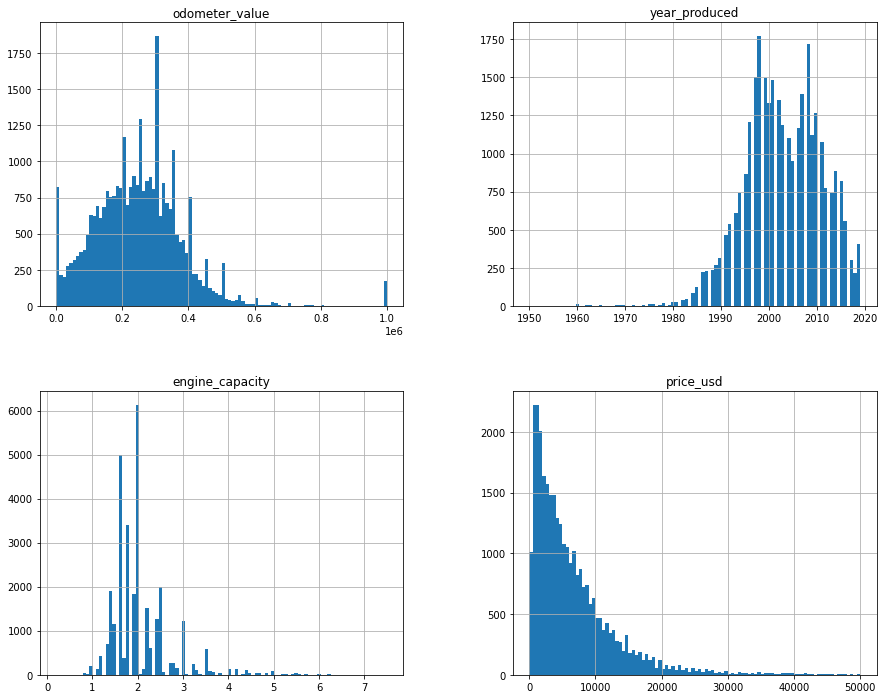

In [109]:
# Visualize histogram of dataset
num_df_train.hist(figsize= (15,12), bins= 100)
plt.show()

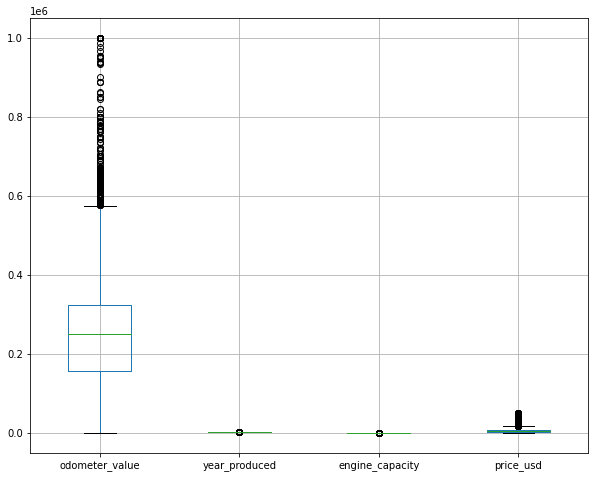

In [110]:
# Boxplot of numerical dataframe
num_df_train.boxplot(figsize= (10,8))
plt.show()

The skewness of odometer_value is: 1.1519237615836586
The kurtosis of odometer_value is: 4.837968796948701


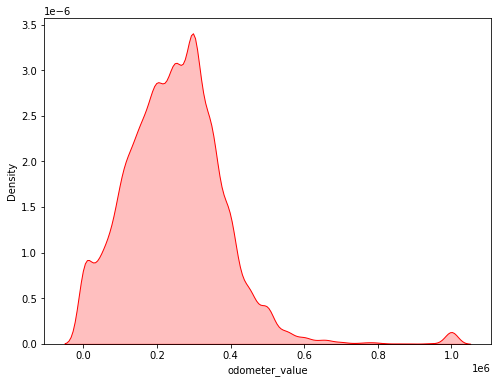

In [111]:
# Statistical analysis on odometer_value
print("The skewness of odometer_value is:", num_df_train['odometer_value'].skew())
print("The kurtosis of odometer_value is:",num_df_train['odometer_value'] .kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(num_df_train['odometer_value'], shade=True, color="r")
plt.show()

The skewness of year_produced is: -0.37260765427777925
The kurtosis of year_produced is: 0.5593910798654074


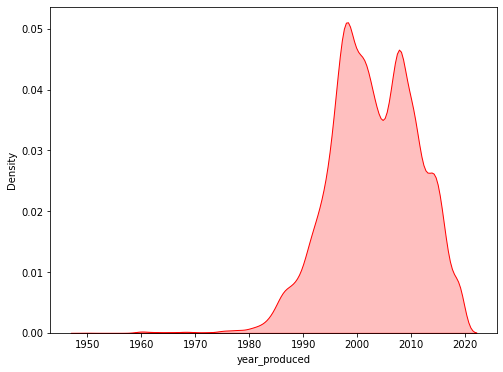

In [112]:
# Statistical analysis on year produced
print("The skewness of year_produced is:", num_df_train['year_produced'].skew())
print("The kurtosis of year_produced is:",num_df_train['year_produced'] .kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(num_df_train['year_produced'], shade=True, color="r")
plt.show()

The skewness of engine_capacity is: 2.0359895915633084
The kurtosis of engine_capacity is: 6.278848102550942


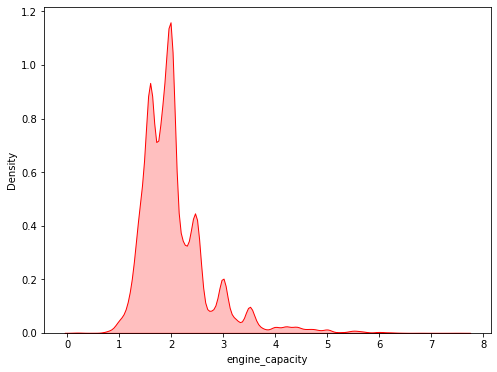

In [113]:
# Statistical analysis on engine capacity
print("The skewness of engine_capacity is:", num_df_train['engine_capacity'].skew())
print("The kurtosis of engine_capacity is:",num_df_train['engine_capacity'] .kurtosis())
plt.figure()
ax = sns.kdeplot(num_df_train['engine_capacity'], shade=True, color="r")
plt.show()

In [114]:
# Statistical analysis on duration listed 
#print("The skewness of duration_listed is:", num_df_train['duration_listed'].skew())
#print("The kurtosis of duration_listed is:",num_df_train['duration_listed'] .kurtosis())
#plt.figure()
#ax = sns.kdeplot(num_df_train['duration_listed'], shade=True)
#plt.show()

The skewness of price_usd is: 2.241204534596233
The kurtosis of price_usd is: 7.3289854802465015


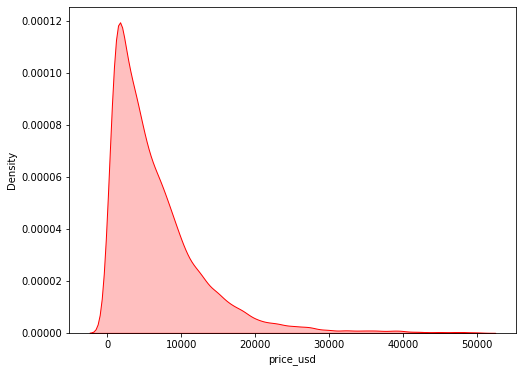

In [115]:
# Statistical analysis on price usd
print("The skewness of price_usd is:", num_df_train['price_usd'].skew())
print("The kurtosis of price_usd is:",num_df_train['price_usd'] .kurtosis())
plt.figure()
ax = sns.kdeplot(num_df_train['price_usd'], shade=True, color="r")
plt.show()

In [116]:
# diagnostic plot to confirm skewness/outliers
def diagnostic_plots(df,variable):
  # functin to plot a histogram and Q-Q plot 
  
  plt.figure(figsize = (15,6))
  plt.subplot(1,2,1)
  df[variable].hist()
  
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist = "norm", plot = plt)
  
  #diagnostic_plots(df,'Age') # how to use function
  
  plt.show()

<Figure size 576x432 with 0 Axes>

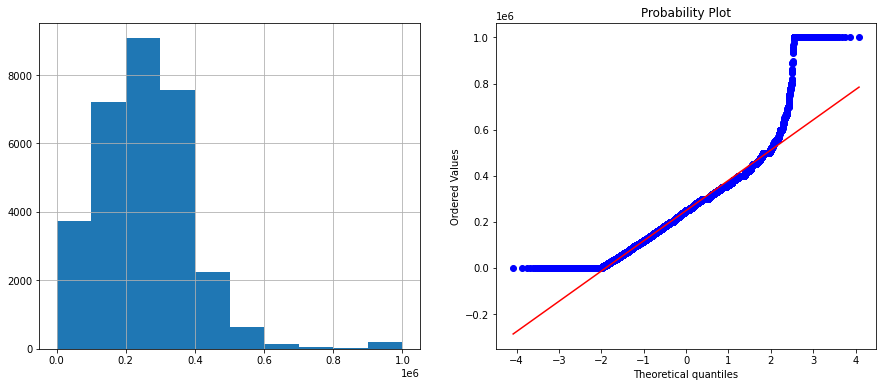

<Figure size 576x432 with 0 Axes>

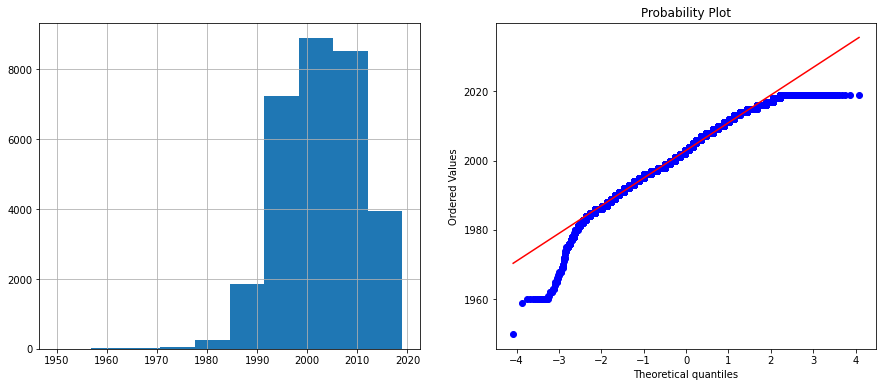

<Figure size 576x432 with 0 Axes>

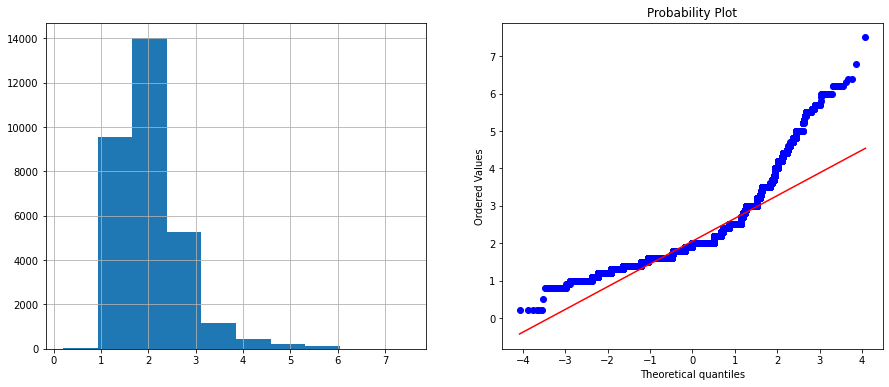

<Figure size 576x432 with 0 Axes>

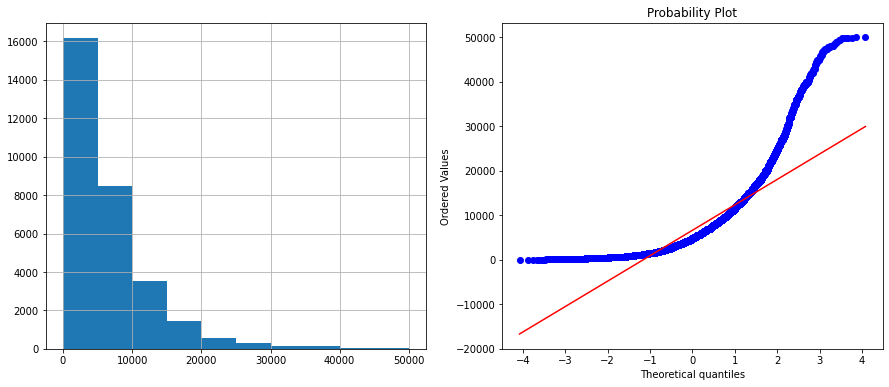

In [117]:
# Confirm skewness with Q-Q plot for all numerical columns

for i,cols in enumerate(num_df_train.columns):
    plt.figure(i)
    diagnostic_plots(num_df_train, cols)
    plt.show()

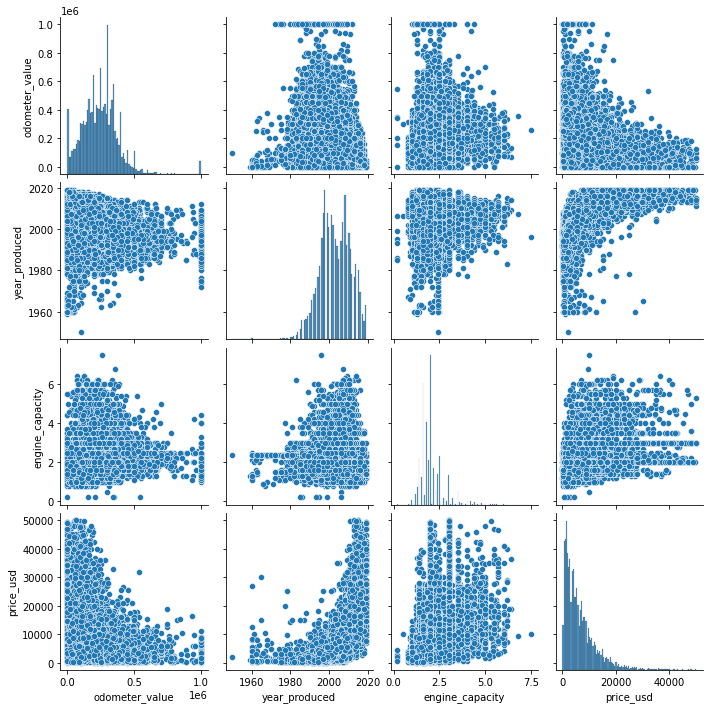

In [118]:
# pairplot on numerical variables
sns.pairplot(num_df_train[num_features_eda])
plt.show()

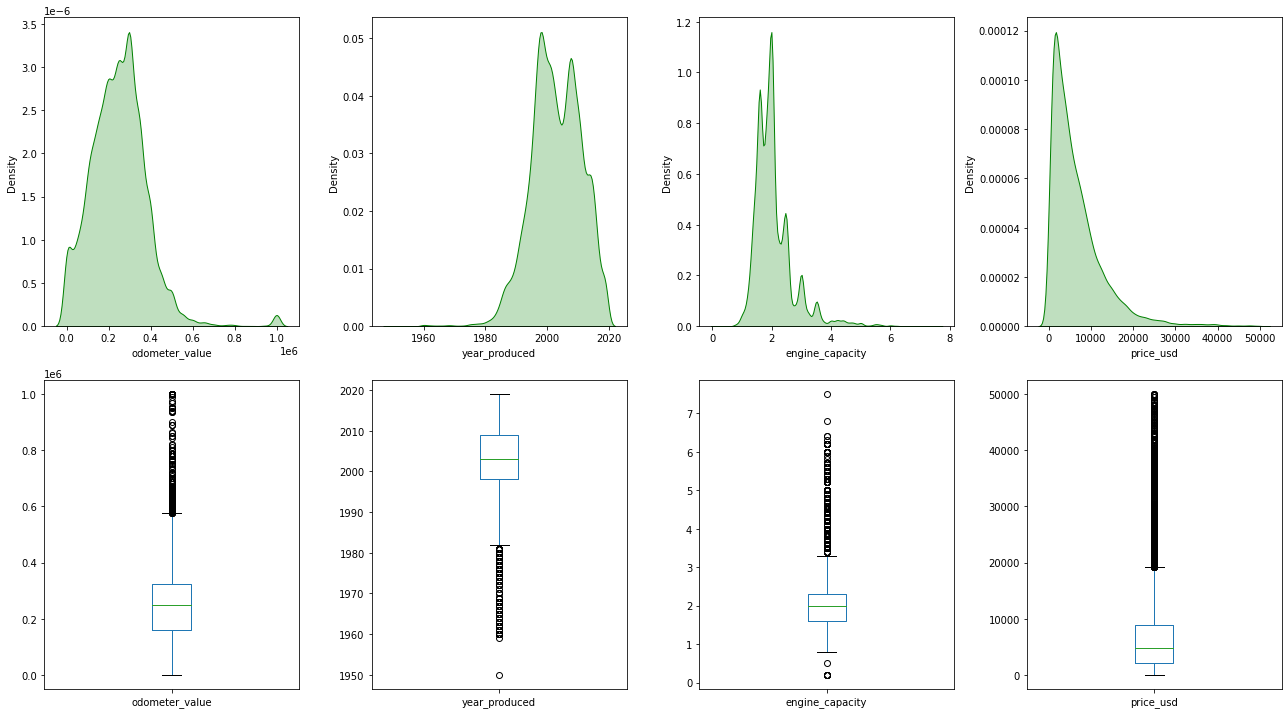

,odometer_value,year_produced,engine_capacity,price_usd
skewness,1.151924,-0.372608,2.035990,2.241205
kurtosis,4.837969,0.559391,6.278848,7.328985


In [119]:
# Visual exploration of numerical colums
plt.figure(figsize= (18,40))
for i,col in enumerate(num_features_eda,1):
    plt.subplot(8,4,i)
    sns.kdeplot(num_df_train[col],color='g',shade=True)
    plt.subplot(8,4,i+len(num_features_eda))
    num_df_train[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = num_df_train[num_features_eda]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7ce98da90>]],
      dtype=object)

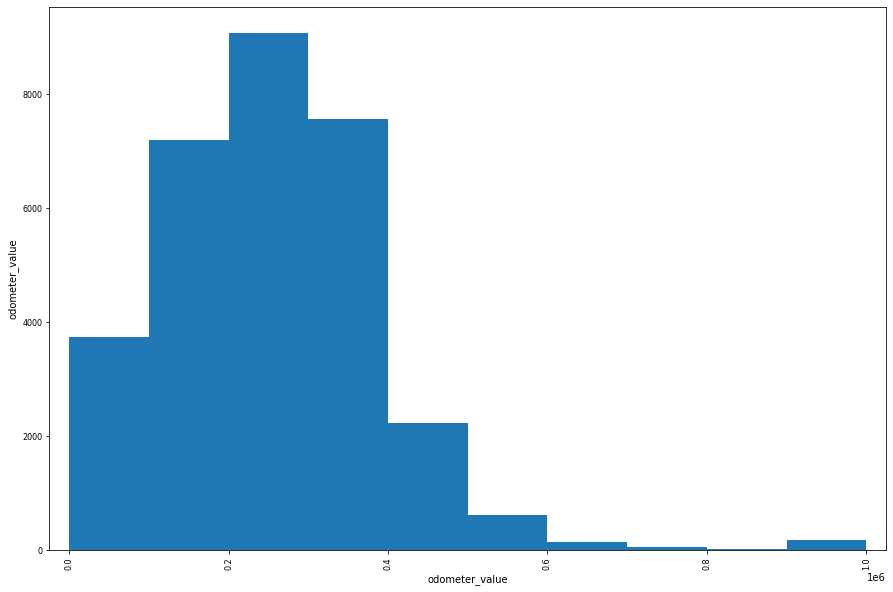

In [120]:
# Plotting the histogram for the RH attribute
from pandas.plotting import scatter_matrix

attributes = ['odometer_value']
scatter_matrix(num_df_train[attributes], figsize=(15,10))

### Explore Categorical features

In [121]:
# Extract categorical features from dataframe
category_cols = [col for col in df_train.columns if df_train[col].dtype == "object"]
category_cols.append('price_usd')
category_cols

['manufacturer_name',
 'model_name',
 'transmission',
 'color',
 'engine_fuel',
 'engine_type',
 'body_type',
 'state',
 'drivetrain',
 'price_usd']

In [122]:
# Create categorical dataframe from train set

cat_df_train = df_train[category_cols].copy()

cat_df_train.head()

,manufacturer_name,model_name,transmission,color,engine_fuel,engine_type,body_type,state,drivetrain,price_usd
0,Ford,Fusion,mechanical,blue,gasoline,gasoline,hatchback,owned,front,4250.0
1,Dodge,Caravan,automatic,silver,gasoline,gasoline,minivan,owned,front,4000.0
2,Ford,Galaxy,mechanical,blue,diesel,diesel,minivan,owned,front,10900.0
3,Mazda,6,mechanical,other,gasoline,gasoline,universal,owned,front,6999.0
4,Audi,80,mechanical,black,gasoline,gasoline,sedan,owned,front,1600.0


In [123]:
# Inspect the dataframe info
cat_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30824 entries, 0 to 30823
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  30824 non-null  object 
 1   model_name         30824 non-null  object 
 2   transmission       30824 non-null  object 
 3   color              30824 non-null  object 
 4   engine_fuel        30824 non-null  object 
 5   engine_type        30824 non-null  object 
 6   body_type          30824 non-null  object 
 7   state              30824 non-null  object 
 8   drivetrain         30824 non-null  object 
 9   price_usd          30824 non-null  float64
dtypes: float64(1), object(9)
memory usage: 2.6+ MB


### Important to check if the missing value for a classification problem is by random or not 

In [124]:
# Check the missing categorical varaibles here
#titanic.groupby(titanic['Age'].isnull()).mean()

In [125]:
# Create new inidcator to cpature missing values rather than inputting missing values
#titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
#titanic.head()

In [126]:
# Let us see the cardanilatity of each column for the categorical columns in X_train_full and X_valid_full
# Unique value sin each columns
for cols in category_cols[:-1]:
    print("Unique values in", cols,  "column in training data:", cat_df_train[cols].nunique())

Unique values in manufacturer_name column in training data: 55
Unique values in model_name column in training data: 1070
Unique values in transmission column in training data: 2
Unique values in color column in training data: 12
Unique values in engine_fuel column in training data: 6
Unique values in engine_type column in training data: 3
Unique values in body_type column in training data: 12
Unique values in state column in training data: 3
Unique values in drivetrain column in training data: 3


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0,

<Figure size 576x432 with 0 Axes>

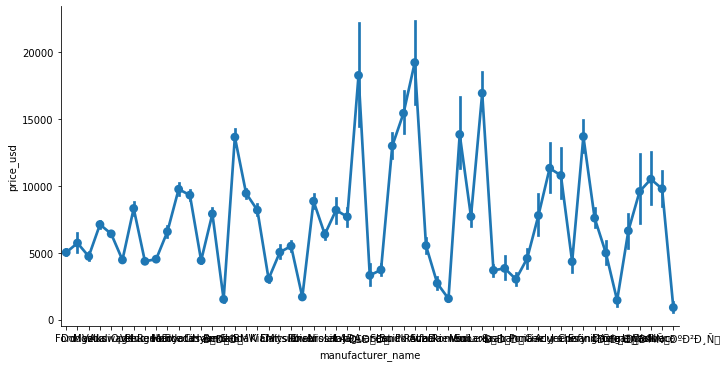

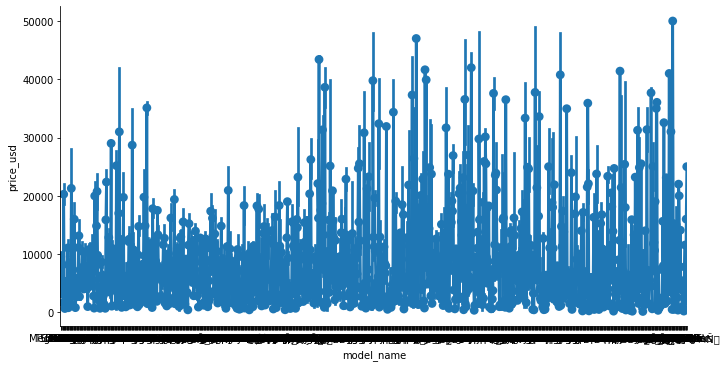

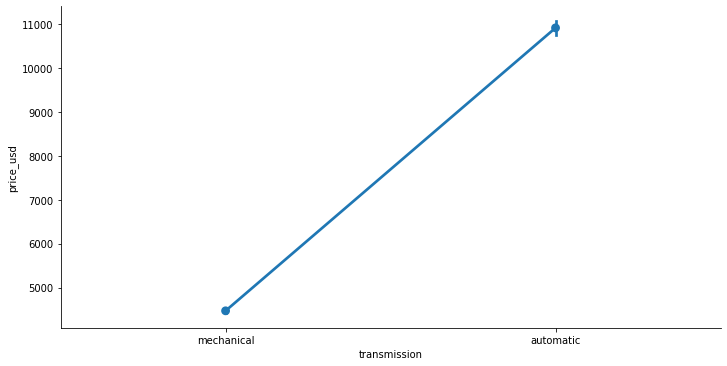

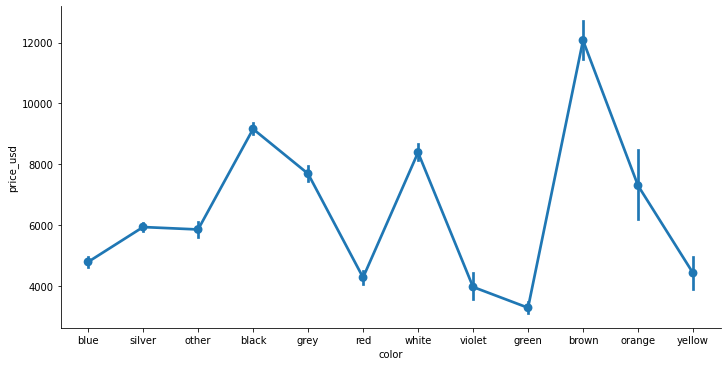

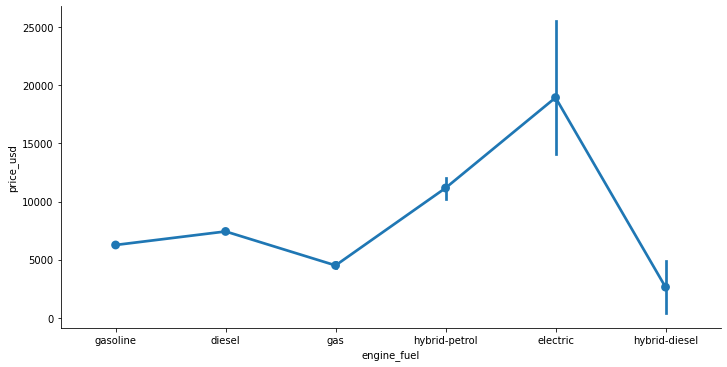

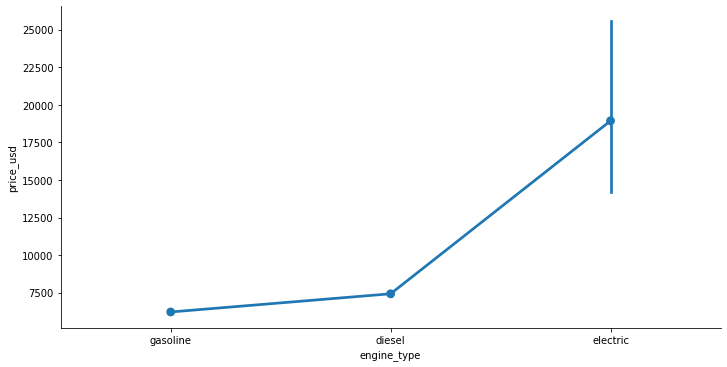

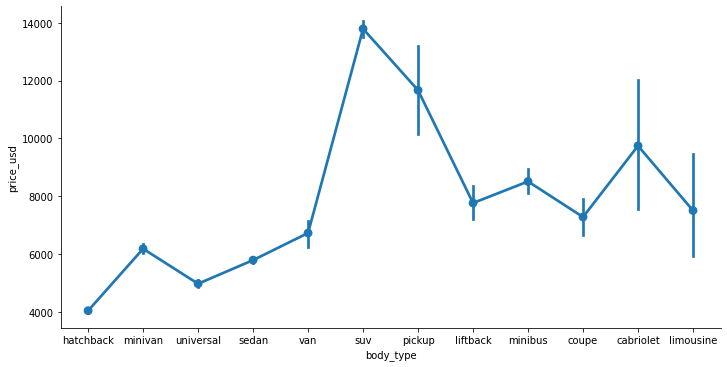

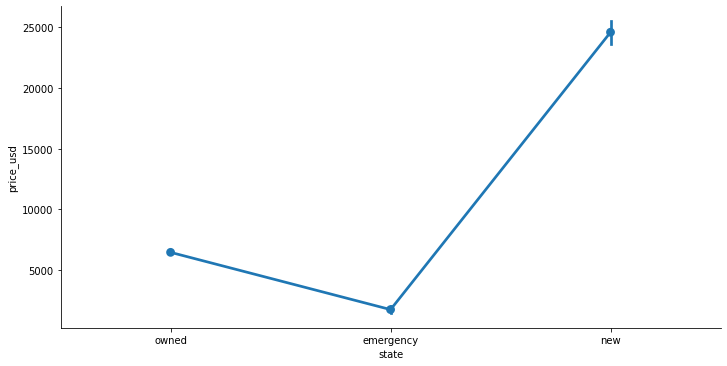

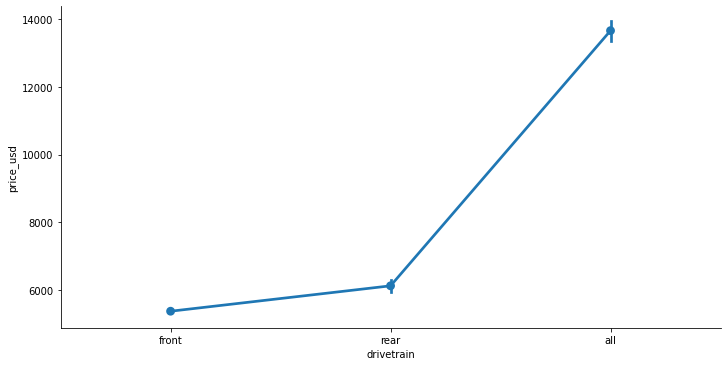

In [127]:
# Let us explore each categorical feature on price_category
for i, col in enumerate(category_cols[:-1]):
    plt.figure(i)
    sns.catplot(x=col, y='price_usd', data=cat_df_train, kind='point', aspect=2, )

In [128]:
# pivot tables
#df_train.pivot_table('price_usd', index='drivetrain', columns='state', aggfunc='count')
cat_df_train.pivot_table('price_usd', index='drivetrain', columns='state')

state,emergency,new,owned
drivetrain,,,
all,4182.769545,37043.073269,13125.419704
front,1621.928063,19624.393384,5239.546679
rear,1281.564828,38850.750000,6181.870809


In [129]:
# pivot tables
cat_df_train.pivot_table('price_usd', index='drivetrain', columns='body_type')

body_type,cabriolet,coupe,hatchback,liftback,limousine,minibus,minivan,pickup,sedan,suv,universal,van
drivetrain,,,,,,,,,,,,
all,12399.666667,17804.443056,11332.138000,18576.250000,NaN,20359.000000,10611.003400,14878.268000,12207.154488,14349.391693,8180.588092,4835.935000
front,4911.600000,4139.358103,3933.971533,6698.085829,9000.000,8718.997849,6059.460954,4113.938667,5336.738113,12295.649190,4800.350524,6121.660750
rear,14873.413636,10267.949831,4850.493985,16735.933333,6943.625,7426.276425,8030.661364,7850.462000,5554.690850,8864.668611,4536.993360,7246.627921


### ANOVA Test

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0,

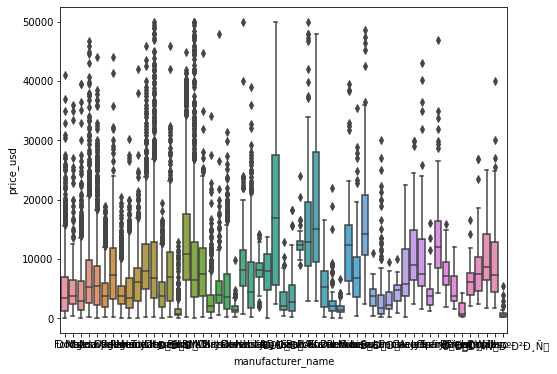

In [130]:
# Manufacture name vs price
sns.boxplot(x ='manufacturer_name', y ='price_usd', data = cat_df_train) 
plt.show()

In [131]:
# manufacturere name and price
cat_df_train.manufacturer_name.value_counts()[0:10]

Volkswagen       3406
Opel             2193
BMW              2091
Ford             2080
Renault          1999
Audi             1972
Mercedes-Benz    1807
Peugeot          1529
Citroen          1236
Nissan           1084
Name: manufacturer_name, dtype: int64

In [132]:
# manufacturere name and price
df_anova = df_train[['manufacturer_name','price_usd']]
grouped_anova1 = df_anova.groupby(["manufacturer_name"])

anova_results_1 = f_oneway(grouped_anova1.get_group("Volkswagen")["price_usd"],
                           grouped_anova1.get_group("BMW")["price_usd"],
                           grouped_anova1.get_group("Ford")["price_usd"],
                           grouped_anova1.get_group("Renault")["price_usd"],
                           grouped_anova1.get_group("Audi")["price_usd"],
                           grouped_anova1.get_group("Mercedes-Benz")["price_usd"],
                           grouped_anova1.get_group("Peugeot")["price_usd"],
                           grouped_anova1.get_group("Citroen")["price_usd"],
                           grouped_anova1.get_group("Opel")["price_usd"])

anova_results_1

F_onewayResult(statistic=254.617078730275, pvalue=0.0)

#### We can see that manufacture_name plays a major role on price

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0,

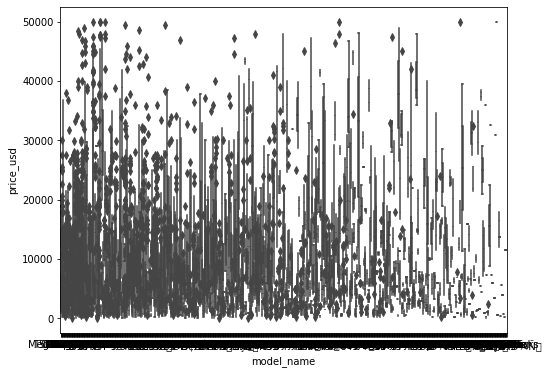

In [133]:
# Model name vs price
sns.boxplot(x ='model_name', y ='price_usd', data = cat_df_train) 
plt.show()

In [134]:
# model name and price
cat_df_train.model_name.value_counts()[0:5]

Passat    1153
Astra      595
Golf       577
A6         546
Mondeo     503
Name: model_name, dtype: int64

In [135]:
# model name and price
df_anova = cat_df_train[['model_name','price_usd']]
grouped_anova1 = df_anova.groupby(["model_name"])

anova_results_1 = f_oneway(grouped_anova1.get_group("Passat")["price_usd"],
                           grouped_anova1.get_group("Astra")["price_usd"],
                           grouped_anova1.get_group("A6")["price_usd"],
                           grouped_anova1.get_group("Mondeo")["price_usd"],
                           grouped_anova1.get_group("Golf")["price_usd"])

anova_results_1

F_onewayResult(statistic=134.97932423469388, pvalue=4.216125472131969e-107)

#### seems that model_name is important

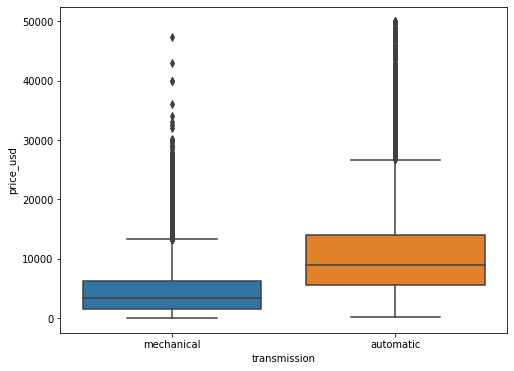

In [136]:
# Transmission vs price
sns.boxplot(x ='transmission', y ='price_usd', data = cat_df_train) 
plt.show()

In [137]:
# model name and price
cat_df_train.transmission.value_counts()[0:5]

mechanical    20493
automatic     10331
Name: transmission, dtype: int64

In [138]:
# model name and price
df_anova = cat_df_train[['transmission','price_usd']]
grouped_anova1 = df_anova.groupby(["transmission"])

anova_results_1 = f_oneway(grouped_anova1.get_group("mechanical")["price_usd"], 
                           grouped_anova1.get_group("automatic")["price_usd"])

anova_results_1

F_onewayResult(statistic=8958.569378736105, pvalue=0.0)

#### The column transmission will not be droped beacuse fscore is high even though pvalue == 0 

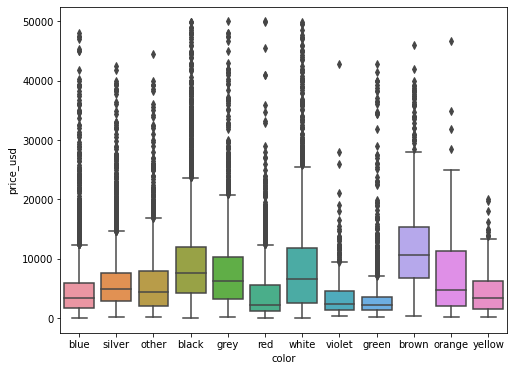

In [139]:
# color and price
sns.boxplot(x ='color', y ='price_usd', data = cat_df_train) 
plt.show()

In [140]:
# color and price
cat_df_train.color.value_counts()

black     6162
silver    5480
blue      4671
white     3390
grey      2962
red       2316
green     2253
other     2141
brown      697
violet     369
yellow     228
orange     155
Name: color, dtype: int64

In [141]:
# color and price
df_anova = cat_df_train[['color','price_usd']]
grouped_anova1 = df_anova.groupby(["color"])

anova_results_1 = f_oneway(grouped_anova1.get_group("black")["price_usd"], 
                           grouped_anova1.get_group("silver")["price_usd"],
                           grouped_anova1.get_group("blue")["price_usd"],
                           grouped_anova1.get_group("white")["price_usd"],
                           grouped_anova1.get_group("grey")["price_usd"],
                           grouped_anova1.get_group("red")["price_usd"],
                           grouped_anova1.get_group("green")["price_usd"],
                           grouped_anova1.get_group("other")["price_usd"],
                           grouped_anova1.get_group("brown")["price_usd"],
                           grouped_anova1.get_group("violet")["price_usd"],
                           grouped_anova1.get_group("yellow")["price_usd"],
                           grouped_anova1.get_group("orange")["price_usd"],
                           )

anova_results_1

F_onewayResult(statistic=335.9220469761454, pvalue=0.0)

#### We keep color feature

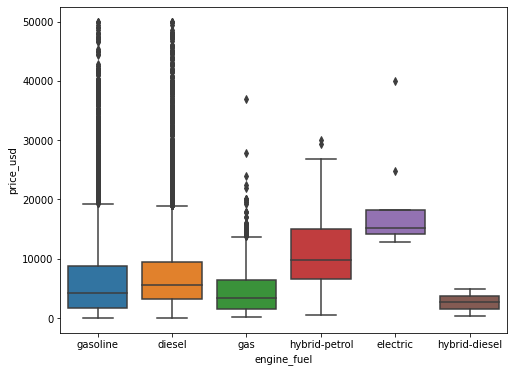

In [142]:
# Engine-fuel vs price
sns.boxplot(x ='engine_fuel', y ='price_usd', data = cat_df_train) 
plt.show()


In [143]:
# engine fuel and price
cat_df_train.engine_fuel.value_counts()

gasoline         19259
diesel           10303
gas               1070
hybrid-petrol      182
electric             8
hybrid-diesel        2
Name: engine_fuel, dtype: int64

In [144]:
# engine fuel and price 
df_anova = cat_df_train[['engine_fuel','price_usd']]
grouped_anova1 = df_anova.groupby(["engine_fuel"])

anova_results_1 = f_oneway(grouped_anova1.get_group("gasoline")["price_usd"],
                           grouped_anova1.get_group("diesel")["price_usd"],
                           grouped_anova1.get_group("gas")["price_usd"],
                           grouped_anova1.get_group("hybrid-petrol")["price_usd"],
                           grouped_anova1.get_group("hybrid-diesel")["price_usd"])

anova_results_1

F_onewayResult(statistic=109.26943445689301, pvalue=1.236189128313056e-92)

### Important feature will be kept

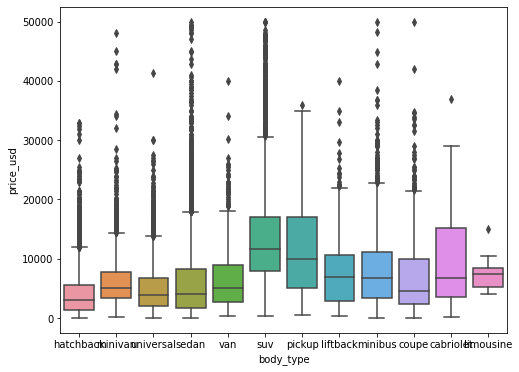

In [145]:
# Body type vs price
sns.boxplot(x ='body_type', y ='price_usd', data = cat_df_train) 
plt.show()

In [146]:
# body type and price
cat_df_train.body_type.value_counts()

sedan        10433
hatchback     6095
universal     4397
suv           4123
minivan       2916
minibus       1093
van            644
coupe          504
liftback       453
pickup         105
cabriolet       50
limousine       11
Name: body_type, dtype: int64

In [147]:
# body type and price 
df_anova = cat_df_train[['body_type','price_usd']]
grouped_anova1 = df_anova.groupby(["body_type"])

anova_results_1 = f_oneway(grouped_anova1.get_group("sedan")["price_usd"],
                           grouped_anova1.get_group("suv")["price_usd"],
                           grouped_anova1.get_group("minivan")["price_usd"],
                           grouped_anova1.get_group("coupe")["price_usd"],
                           grouped_anova1.get_group("van")["price_usd"])

anova_results_1

F_onewayResult(statistic=1233.088689179982, pvalue=0.0)

#### Body_type column Will be kept 

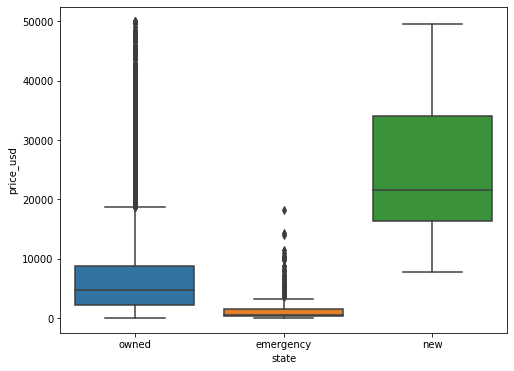

In [148]:
# state vs price
sns.boxplot(x ='state', y ='price_usd', data = cat_df_train) 
plt.show()

In [149]:
# state and price
cat_df_train.state.value_counts()

owned        30154
new            368
emergency      302
Name: state, dtype: int64

In [150]:
# state and price 
df_anova = cat_df_train[['state','price_usd']]
grouped_anova1 = df_anova.groupby(["state"])

anova_results_1 = f_oneway(grouped_anova1.get_group("owned")["price_usd"],
                           grouped_anova1.get_group("new")["price_usd"],
                           grouped_anova1.get_group("emergency")["price_usd"])

anova_results_1

F_onewayResult(statistic=1714.8825743086293, pvalue=0.0)

#### State column Will be kept 

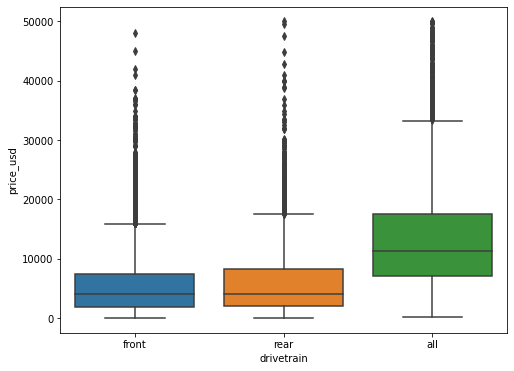

In [151]:
# drive train vs price
sns.boxplot(x ='drivetrain', y ='price_usd', data = cat_df_train) 
plt.show()

In [152]:
# Drivetrain and price
cat_df_train.drivetrain.value_counts()

front    22193
rear      4350
all       4281
Name: drivetrain, dtype: int64

In [153]:
# Drivetrain and price 
df_anova = cat_df_train[['drivetrain','price_usd']]
grouped_anova1 = df_anova.groupby(["drivetrain"])

anova_results_1 = f_oneway(grouped_anova1.get_group("front")["price_usd"],
                           grouped_anova1.get_group("rear")["price_usd"],
                           grouped_anova1.get_group("all")["price_usd"])

anova_results_1

F_onewayResult(statistic=3744.3305431675126, pvalue=0.0)

#### Drivetrain column Will not be dropped

In [154]:
# Extract Boolean features from dataframe
bool_cols = [col for col in df_train.columns if df_train[col].dtype == "bool"]
bool_cols

['engine_has_gas',
 'has_warranty',
 'feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9']

In [155]:
# Print bool categories for df_train for inspection
bool_train_df = df_train[bool_cols].copy()
bool_train_df.head()

,engine_has_gas,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,True,True,True,True
3,False,False,False,True,True,False,False,True,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,True


In [156]:
bool_num = {False: 0, True: 1}

for cols in bool_train_df.columns:
    df_train[cols] = df_train[cols].map(bool_num)
    df_test[cols]= df_test[cols].map(bool_num)


df_train.head(10)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,0,gasoline,1.6,hatchback,0,owned,front,1,0,0,0,0,0,0,0,0,0,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,0,gasoline,3.3,minivan,0,owned,front,0,1,0,0,0,0,0,0,0,0,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,0,diesel,1.8,minivan,0,owned,front,0,0,0,1,0,0,1,1,1,1,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,0,gasoline,1.8,universal,0,owned,front,0,1,1,0,0,1,0,0,1,1,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,0,gasoline,1.8,sedan,0,owned,front,0,0,0,0,0,0,0,0,0,1,160,1600.0
5,Volkswagen,T5 Multivan,mechanical,black,287827,2004,diesel,0,diesel,2.5,minivan,0,owned,front,0,1,0,0,0,0,0,0,0,0,43,11550.0
6,Opel,Astra,mechanical,blue,270000,1992,gasoline,0,gasoline,1.4,hatchback,0,owned,front,1,0,0,0,0,0,0,0,0,0,20,730.0
7,Ford,Sierra,mechanical,blue,290000,1988,gasoline,0,gasoline,2.0,hatchback,0,emergency,rear,1,0,0,0,0,0,0,0,0,0,378,200.0
8,Volvo,S40,automatic,other,205000,2004,gasoline,0,gasoline,2.4,sedan,0,owned,front,0,1,1,1,0,1,0,0,1,1,268,5690.0
9,Peugeot,Partner,mechanical,silver,350000,1999,diesel,0,diesel,1.9,van,0,owned,front,1,0,0,0,0,0,0,0,0,0,35,2700.0


In [158]:
# Save new cleaned dataset
df_train.to_csv('Train.csv')
df_test.to_csv('Test.csv')
